# Fundamentos matematicos.
## Tensores.
Hay tres escuelas para los tensores:
* Matematica
* Fisica
* Computacional.
Al final del dia la computacional es la que nos sirve para ML, DL.
Sin embargo voy a decir unas pocas palabras de las otra dos.

### Motivacion:
Conocemos del algebra lineal los escalares que los notamos, en este curso, con letras griegas, las matrices con letras mayusculas y los tensores (letras minusculas, acompanhados con indices -super-sub).

Repito, en Alegra Lineal no vamos mas alla de matrices (en dimensiones). Entonces como planteamos el siguiente problema.

Tenemos una base de datos de $n$ imagenes, donde cada imagen tiene $m \times k$ pixeles, y cada pixel puede tener varios canales. Por ejemplo si es RGB tiene tres canales, o CMYK (Cian-Mayenta-Yellow-Black), Si queremos localizar un pixel en un canal necesitamos 4 "coordenadas". Realmente son cuatro indices.
La imagen la podemos describir como

$I_{ijkl}$

* donde $i$ es el numero de la imagen la base de datos
* donde $j$ la coordenada horizontal del pixel ($x$)
* donde $k$ es la coordenada vertical del pixel ($y$)
* donde $l$ es el canal (1,2,3, 4).

El algebra lineal, tradicional no llega a este punto.
Este objeto $I_{ijkl}$ es lo que llaman en la ciencia de la computacion un **tensor** de orden (rango, rank) 4.
OJO!!!! en Python (NumPy) dicen que la dimensiones 4 y esto no es asi. Desde el punto de vista fisico, un **tensor** es un objeto que es invariante ante cualquier transformacion lineal y esto esta muy cerca del punto de vista matematico que vemos a continuacion.

Podemos decir que los escalares son **tensores de rango 0**,
los vectores son **tensores de rango 1**, las matrices son **tensores de rango 2** y el objeto $I_{ijkl}$ de arriba seria un tensor de rango 4.

En ML usaremos el paquete **Tensorflow** para manejar estos tensores. Sin embargo, voy a mostrar, mas adelante en esta clase, como usar NumPy para manejar estos objetos.

### Transformaciones multi-lineales.
Este es el enfoque matematico.
Comenzamos con las transformaciones lineales mas simples.

* $x \in \mathbb{R}$, $y \in \mathbb{R}$, $a \in \mathbb{R}$.
Definimos

$$ Tx = y = ax $$.
Esto es una recta que pasa por el origen. Que objeto $y$ que se transforma linealmente mediante $T$ es un tensor de rango 0. Pues es un escalar.  Una transformacion lineal cumple que
$T( \alpha x + \beta y) = \alpha T(x) + \beta T(y)$.

Queremos ir mas lejos. En el algebra lineal podemos transformar un vector en $\mathbb{R}^n$ a un vector en $\mathbb{R}^m$.

* $x \in \mathbb{R}^n$, $y \in \mathbb{R}^m$ y definimos

$$ Tx = y = ax $$

Quien es $a$? Tiene que ser una matrix. En efecto
$a \in \mathbb{R}^m \times \mathbb{R}^n$. En este caso
$y$ es un tensor de rango 1 (un vector). Para ver como construimos $a$ usamos el principio de la transformacion lineal,
donde si $c_1, c_2 \in \mathbb{R}$, y $T(c_1 x_1 + c_2 x_2) = c_1 T(x_1 ) + c_2 T(x_2)$.

Construyamos $a$. La forma de construir la matriz $a$ (la transformacion) es estudiando los vectores base.
Para hallar $a$ usamos los vectores base en $\mathbb{R}^n$.

Sean estos

\begin{eqnarray}
e_1 = \begin{pmatrix} 1 \\ 0 \\ \vdots \\ \vdots \\ 0 \end{pmatrix} \quad , \quad
e_2 = \begin{pmatrix} 0 \\ 1 \\ \vdots \\ \vdots \\ 0 \end{pmatrix} \quad , \quad
e_k = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 1 \\ \vdots  \\ 0 \end{pmatrix} \quad , \quad
e_n = \begin{pmatrix} 0 \\ 0 \\ \vdots \\ \vdots \\ 1 \end{pmatrix} \quad , \quad
\end{eqnarray}

Haciendo uso del algebra lineal si $x$ es un vector con componentes $x_i$ en $\mathbb{R}^n$, $x= \sum_{i=1}^n x_i e_i$

Aplicando la transformacion lineal tenemos

$$Tx = T \left ( \sum_{i=1}^n x_i e_i   \right ) = \sum_{i=1}^n x_i T(e_i).$$

$T(e_i)$ es un vector "columna" en el espacio $\mathbb{R}^m$.

La matriz $a$ esta conformada por esos vectores columna.

Escribamos la matriz $a$

\begin{eqnarray}
a = \begin{pmatrix}
| & |  & \vdots & \vdots & | \\
T(e_1)  & T(e_2) & \vdots & \vdots & T(e_n) \\
| & |  & \vdots & \vdots & | \\
\end{pmatrix}
\end{eqnarray}

Hasta aca llega el algebra lineal. Empezamos a entrar en el mundo del algebra multi-lineal.

* $x \in \mathbb{R}^{n \times m}, y \in \mathbb{R}^{p \times q} $

La transformacion (multilineal) (el nombre, en general, es lineal)

$$ Tx = y = ax $$

Por semejanza con el ejemplo anterior construimos los vectores (matrices) base. Por ejemplo, para no complicarnos mucho si $n=m=2$.

\begin{eqnarray}
e_{11} = \begin{bmatrix} 1 & 0 \\ 0 & 0  \end{bmatrix} \quad , \quad
e_{12} = \begin{bmatrix} 0 & 1 \\ 0 & 0  \end{bmatrix} \quad , \quad
e_{21} = \begin{bmatrix} 0 & 0 \\ 1 & 0  \end{bmatrix} \quad , \quad
e_{22} = \begin{bmatrix} 0 & 0 \\ 0 & 1  \end{bmatrix} \quad , \quad
\end{eqnarray}

Definamos el producto tensorial (por el momento, pues mas adelante vamos a hablar de algebra de tensores donde generalizamos esto) de dos vectores $a_i$, $b_j$ (en la notacion decimos que $a_i$ es un vector $\in \mathbb{R}^n$ y lo mismo $b_j$

Definimos el producto **tensorial** (tambien llamado **outer product** o producto externo, entre estos dos vectores y lo notamos $\otimes$,

$$ c_{ij} = (a \times b)_{ij} = a_i b_j $$

Por ejemplo encontramos que

$$e_{11} = e_1 \otimes e_2  = \begin{pmatrix} 1 \times 1 & 1 \times 0 \\ 0 \times 1 & 0 \times 0  \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 0  \end{pmatrix} $$

Gneneralizemos esto:


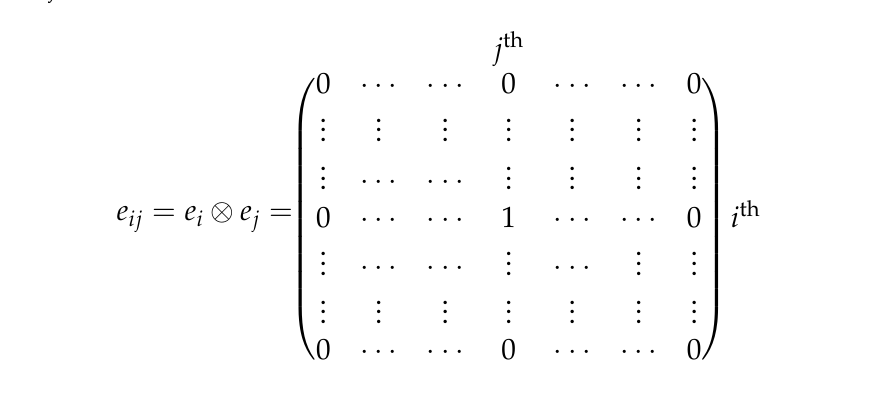

Generalizando tenemos:

$$x = \sum_{i=1}^n \sum_{j=1}^m x_{ij} e_{ij} = \sum_{i=1}^n \sum_{j=1}^m x_{ij} e_i \otimes e_j.  $$

En este momento aplicamos la transformacion $T$ que es lineal

$$ Tx = \sum_{i=1}^n \sum_{j=1}^m x_{ij} T( e_{ij}) \tag{1}$$

El objeto $a$ tiene la forma (recuerde que cada $T(e_{ij})$ cae
en el espacio $\mathbb{R}^{p \times q}$.

$$ a_{st}^{ij} = T_{st}(e_{ij}) \quad , \quad s=1, 2, \cdots, p \quad , \quad t = 1, 2, \cdots, q   $$

La cosa se vuelve mas complicada si queremos generalizar espacios mucho mayores, como veremos enseguida. Entonces las notaciones se vuelven mas engorrosas $\sum \sum \sum \sum$ y si tenemos espacios de $A_1 \otimes A_2 \otimes A_3 \cdots \otimes A_n$ notacion implica $n$ sumatorias que vuelven las formulas muy congestionadas. Entonces Albert Einstein, invento una notacion que se llama *Einstein notation* donde se eliminan los $\Sigma$s de las sumas y se asume que los **indices repetidos** son sobre los cuales se suma y se llaman **dummies** (mudos) y aparecen en pares (solo dos) y los indeces **free** (libres) aparecen **solo una vez**. Entonces la formula 1 se convierete en

$$T x = x_{ij} T(e_{ij}) .  $$

Listo para ir a la gran generalizacion.

Pensemos en $x \in \mathbb{R}^{n_1 \times n_2 \times \cdots \times n_j }$ (ojo Numpy dice que tiene $n_j$ dimensiones, el algebra lineal nos ensena que tiene $n_1 \times n_2 \times \cdots \times n_j$ dimensiones. Este es el espacio de entrada, el de salida es $y \in \mathbb{R}^{m_1 \times m_2 \times \cdots \times m_k}$

En la transformacion lineal (multilineal)

$$y= T x = a x.$$
Quien es $a$?
Generalizando lo anterior podemos construir una base en el espacio de entrada donde los "vectores" son

$$e_{p_1 p_2 \cdots p_j} = e_{p_1} \otimes e_{p_2} \otimes \cdots \otimes e_{p_j} $$ y tenemos la siguiente relacion lineal

$$ T(x) = x_{p_1 p_2 \cdots p_j} T(e_{p_1 p_2 \cdots p_j}).$$

Quien es $a$?

$$[ T(e_{p_1 p_2 \cdots p_j})]_{q_1 q_2 \cdots q_k} = a_{q_1 q_2 \cdots q_k}^{p_1 p_2 \cdots p_j} $$

A $y$ se le llama **tensor de rango $k$**, al $x$ un **tensor de rango** $j$ y al $T$ se va a llamar un tensor de rango $k$ contravariante y $j$ covariante .  Las palabras **contravirante** y **covariante** se usan en la fisica. Una explicacion a mano alzada.

### Notacion Indizal (index notation).
Para nosotros $a_i$ es un vector donde $i$ es el indice de cada componente del vector. Para nosotros $(a_i) \in \mathbb{R}^n$
es decir, cada componente esta en $\mathbb{R}$. Los indices
son naturales o enteros, positivos o 0. $i \in \{1,2, \cdots, \}$.
Ojo, los programadores de Python quieren que $i$ comience en $0$.
$a_0, a_1, \cdots $.

